In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
file=r'C:\Users\chirag\Desktop\ML IITK\Unsupervised Learning\DATA\rg_train.csv'

In [3]:
bd=pd.read_csv(file)

In [5]:
bd.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment.Tax.Saving.Bond,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance
0,2148,1,45-50,Partner,Professional,Professional,Rent Privately,">=35,000",Yes,Yes,...,7.49,2.48,0.0,2,Female,South West,65.87,9.27,30.93,87.48
1,8099,1,61-65,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,...,0.00,3.99,0.0,2,Female,Unknown,42.46,4.49,26.23,110.73
2,6611,3,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.0,2,Male,East Anglia,75.38,0.00,26.66,127.57
3,1950,Zero,55-60,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,2.00,0.00,0.0,2,Female,North West,34.78,6.91,29.24,33.79
4,10857,2,51-55,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,Yes,...,0.00,0.00,0.0,2,Female,South West,48.58,9.58,20.65,56.17


In [6]:
bd=bd.select_dtypes(exclude=['object'])
bd.drop(['REF_NO','year_last_moved','Revenue.Grid'],1,inplace=True)

C:\Users\chirag\AppData\Local\Temp/ipykernel_1724/2731359843.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bd.drop(['REF_NO','year_last_moved','Revenue.Grid'],1,inplace=True)


In [7]:
bd.columns

Index(['Average.Credit.Card.Transaction', 'Balance.Transfer', 'Term.Deposit',
       'Life.Insurance', 'Medical.Insurance', 'Average.A.C.Balance',
       'Personal.Loan', 'Investment.in.Mutual.Fund',
       'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount',
       'Investment.in.Commudity', 'Investment.in.Equity',
       'Investment.in.Derivative', 'Portfolio.Balance'],
      dtype='object')

In [8]:
bd.shape

(8124, 15)

In [9]:
bd.corr()

,Average.Credit.Card.Transaction,Balance.Transfer,Term.Deposit,Life.Insurance,Medical.Insurance,Average.A.C.Balance,Personal.Loan,Investment.in.Mutual.Fund,Investment.Tax.Saving.Bond,Home.Loan,Online.Purchase.Amount,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance
Average.Credit.Card.Transaction,1.000000,0.131247,0.327683,0.151843,0.412965,0.182275,0.088369,0.160531,0.144391,0.103755,0.143003,0.500684,0.217414,0.235417,0.343141
Balance.Transfer,0.131247,1.000000,0.231907,0.575132,0.165961,0.366227,0.379167,0.472585,0.170320,0.158646,0.118873,0.745583,0.491684,0.598631,0.655342
Term.Deposit,0.327683,0.231907,1.000000,0.271555,0.511208,0.279363,0.138317,0.209032,0.177183,0.181207,0.101145,0.619214,0.266787,0.348581,0.450340
Life.Insurance,0.151843,0.575132,0.271555,1.000000,0.235929,0.525849,0.397697,0.558936,0.275477,0.287668,0.134576,0.805671,0.588279,0.846322,0.796641
Medical.Insurance,0.412965,0.165961,0.511208,0.235929,1.000000,0.269954,0.096484,0.210393,0.200833,0.149944,0.149406,0.548275,0.268001,0.385559,0.437802
Average.A.C.Balance,0.182275,0.366227,0.279363,0.525849,0.269954,1.000000,0.213168,0.445579,0.310369,0.370177,0.165889,0.528605,0.600676,0.654116,0.617890
Personal.Loan,0.088369,0.379167,0.138317,0.397697,0.096484,0.213168,1.000000,0.405653,0.219133,0.115966,0.058534,0.390915,0.684679,0.694960,0.607273
Investment.in.Mutual.Fund,0.160531,0.472585,0.209032,0.558936,0.210393,0.445579,0.405653,1.000000,0.271395,0.264976,0.112027,0.550775,0.711307,0.771541,0.707945
Investment.Tax.Saving.Bond,0.144391,0.170320,0.177183,0.275477,0.200833,0.310369,0.219133,0.271395,1.000000,0.262854,0.211065,0.297435,0.440509,0.403580,0.396257
Home.Loan,0.103755,0.158646,0.181207,0.287668,0.149944,0.370177,0.115966,0.264976,0.262854,1.000000,0.104253,0.282282,0.347139,0.334980,0.330888


In [11]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

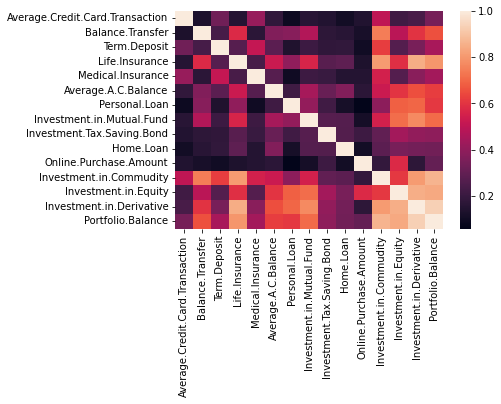

In [12]:
sns.heatmap(bd.corr())

In [13]:
bd.shape

(8124, 15)

In [14]:
X=bd.copy()
X=scale(X)
pca=PCA(n_components=15)

pca.fit(X)
pca.components_.shape

(15, 15)

In [15]:
var=np.round(pca.explained_variance_ratio_,3)
print(var)

[0.463 0.108 0.082 0.068 0.054 0.046 0.044 0.04  0.033 0.031 0.027 0.004
 0.    0.    0.   ]


In [16]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[ 46.29  57.06  65.3   72.06  77.49  82.07  86.51  90.56  93.84  96.92
  99.58 100.01 100.01 100.01 100.01]


In [17]:
pca=PCA(n_components=11)
pca.fit(X)
pca.components_.shape

(11, 15)

In [18]:
X.shape

(8124, 15)

In [20]:
X1=pd.DataFrame(pca.transform(X))

In [21]:
X1.shape

(8124, 11)

In [22]:
X1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.219023,-1.225702,-0.704840,-0.133726,-0.225244,-1.179293,1.488343,-0.846796,0.538255,1.735882,-1.452645
1,-0.536690,0.552568,-0.774464,-0.004869,0.634582,-0.187944,-0.179863,-0.636877,0.154433,-0.506403,-0.583435
2,0.451136,-4.430763,-0.461111,0.891647,-1.015495,0.340722,0.651389,0.656770,-0.977120,-1.703000,0.388787
3,-0.821123,0.513644,-0.498847,-0.147921,0.563338,-0.363394,-0.282702,0.156067,0.568836,-0.374686,-0.583131
4,-0.370655,0.267894,-0.880087,0.024170,1.113919,-0.582590,-0.272975,-0.315076,0.617274,-0.261043,0.940379


INDIVIUAL PC LOADING

In [23]:
loadings=pca.components_[1]

In [24]:
list(zip(bd.columns,loadings))

[('Average.Credit.Card.Transaction', -0.48306420784435294),
 ('Balance.Transfer', 0.10752836266863157),
 ('Term.Deposit', -0.4770906208554826),
 ('Life.Insurance', 0.11587782020052821),
 ('Medical.Insurance', -0.5165069199804292),
 ('Average.A.C.Balance', 0.023722379664331893),
 ('Personal.Loan', 0.30523142202757325),
 ('Investment.in.Mutual.Fund', 0.1986927513375178),
 ('Investment.Tax.Saving.Bond', 0.018568496890345846),
 ('Home.Loan', 0.0036679071927285738),
 ('Online.Purchase.Amount', -0.014623036759576024),
 ('Investment.in.Commudity', -0.22266937705057363),
 ('Investment.in.Equity', 0.2050795103357765),
 ('Investment.in.Derivative', 0.14547918954508007),
 ('Portfolio.Balance', 0.026091857672490653)]

<AxesSubplot:>

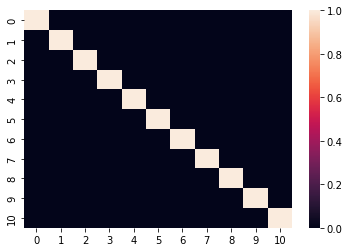

In [25]:
sns.heatmap(X1.corr())